# A Brief Introduction to Pandas
### Wrangling data with Python

In this notebook, we will cover the basics of Pandas, a dynamic, powerful Python library that is ubiquitous in the field of Data Science. It has robust I/O functionality and makes working with data a lot simpler than doing so in Excel. Let's get stared.

In [198]:
import pandas as pd
import matplotlib.pyplot as pyplot

## 1.1 DataFrames
Let's read in some existing data using Pandas convenient read_csv method.

In [94]:
unemployment_df = pd.read_csv('./data/unemployment_2016.csv')

In [95]:
# Check the type
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
type(unemployment_df)

pandas.core.frame.DataFrame

In [96]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     32 non-null     object 
 1   unemp_rate  32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 640.0+ bytes


In [97]:
unemployment_df.describe()

,unemp_rate
count,32.000000
mean,8.337500
std,4.393378
min,3.000000
25%,5.700000
50%,7.300000
75%,9.800000
max,23.600000


In [98]:
# Select a single column
# Using bracket notation
countries = unemployment_df['country']
# Using dot notation
countries = unemployment_df.country

In [99]:
# Access by numeric index
unemployment_df[0]

KeyError: 0

In [100]:
# Check the type
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
type(countries)

pandas.core.series.Series

In [101]:
# Series objects do not have the same methods as dataframes
countries.info()
countries.describe()

AttributeError: 'Series' object has no attribute 'info'

## 1.2 Vectorized Operations
In Pandas, operations work on each value in most data structures, such as dataframes and series.

In [102]:
# Add a string to the countries series
countries + " is in Europe."

0            Austria is in Europe.
1            Belgium is in Europe.
2           Bulgaria is in Europe.
3        Switzerland is in Europe.
4             Cyprus is in Europe.
5            Czechia is in Europe.
6            Germany is in Europe.
7            Denmark is in Europe.
8            Estonia is in Europe.
9             Greece is in Europe.
10             Spain is in Europe.
11           Finland is in Europe.
12            France is in Europe.
13           Croatia is in Europe.
14           Hungary is in Europe.
15           Ireland is in Europe.
16           Iceland is in Europe.
17             Italy is in Europe.
18         Lithuania is in Europe.
19        Luxembourg is in Europe.
20            Latvia is in Europe.
21             Malta is in Europe.
22       Netherlands is in Europe.
23            Norway is in Europe.
24            Poland is in Europe.
25          Portugal is in Europe.
26           Romania is in Europe.
27            Sweden is in Europe.
28          Slovenia

In [103]:
# Add a number to the countries series
countries + 12

TypeError: can only concatenate str (not "int") to str

In [104]:
# Select the unemployment rates as a series
unemployment_rates = unemployment_df['unemp_rate']
print(unemployment_rates)

0      6.0
1      7.8
2      7.6
3      5.0
4     13.0
5      4.0
6      4.1
7      6.2
8      6.8
9     23.6
10    19.6
11     8.8
12    10.1
13    13.1
14     5.1
15     8.4
16     3.0
17    11.7
18     7.9
19     6.3
20     9.6
21     4.7
22     6.0
23     4.7
24     6.2
25    11.2
26     5.9
27     7.0
28     8.0
29     9.7
30    10.9
31     4.8
Name: unemp_rate, dtype: float64


In [105]:
# Sort the dataframe by rate
unemployment_sorted_asc = unemployment_df.sort_values('unemp_rate', ascending=True)

In [106]:
# Use .head() to get the top five values
unemployment_sorted_asc.head()

,country,unemp_rate
16,Iceland,3.0
5,Czechia,4.0
6,Germany,4.1
23,Norway,4.7
21,Malta,4.7


In [107]:
# Use .tail() to get the  five values
unemployment_sorted_asc.tail()

,country,unemp_rate
17,Italy,11.7
4,Cyprus,13.0
13,Croatia,13.1
10,Spain,19.6
9,Greece,23.6


### Exercise - What is the average unemployment of the seven countries with the highest unemployment in europe?

In [108]:
# Sort the values of the unemployment_df - descending or ascending?
unemployment_sorted_desc = unemployment_df.sort_values('unemp_rate', ascending=False)
# Get the first seven rows in the returned series
highest_unemployment = unemployment_sorted_desc.head(7)
# Get the average of those rows
highest_unemployment_avg = highest_unemployment['unemp_rate'].mean()

### Extra - explore these methods:
.min(), .max(), .sum(), .unique(), .nunique(), .count(), .duplicated()

In [109]:
unemployment_rates.min()
unemployment_rates.max()
unemployment_rates.sum()
unemployment_rates.unique()
unemployment_rates.nunique()
unemployment_rates.count()
dups = unemployment_rates.duplicated()
dups_no_keep = unemployment_rates.duplicated(keep=False)
unemployment_df[dups_no_keep]

,country,unemp_rate
0,Austria,6.0
7,Denmark,6.2
21,Malta,4.7
22,Netherlands,6.0
23,Norway,4.7
24,Poland,6.2


## 1.3 Merging DataFrames
Data can come from a variety of different sources and it can be helpful to put them all in one place.

In [110]:
gdp_filepath = './data/gdp_2016.csv'
# Read in data using this filepath
gdp_df = pd.read_csv(gdp_filepath)

In [111]:
# Inspect the GDP data
gdp_df.info()
gdp_df.describe()
gdp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  32 non-null     object 
 1   gdp      32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 640.0+ bytes


,country,gdp
0,Cyprus,18490.2
1,Latvia,25037.7
2,Lithuania,38849.4
3,Luxembourg,53303.0
4,Hungary,113903.8


Let's create a new dataframe by merging two existing dataframes. This is the one we'll use for the rest of section 2.

In [115]:
# Merge unemployment df with gdp df
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
eur_data = pd.merge(unemployment_df, gdp_df)
eur_data.head()

,country,unemp_rate,gdp
0,Austria,6.0,356237.6
1,Belgium,7.8,424660.3
2,Bulgaria,7.6,48128.6
3,Switzerland,5.0,605753.7
4,Cyprus,13.0,18490.2


What other data can we include? Are there other file types that we can work with?

In [114]:
# Read in misc data from excel
misc_filepath = './data/misc_data.xlsx'
misc_data = pd.read_excel(misc_filepath)
misc_data.head()

,country,avg_hrs_worked
0,Austria,36.5
1,Belgium,37.0
2,Bulgaria,40.8
3,Switzerland,34.7
4,Cyprus,39.2


In [116]:
# .read_excel() gets the first sheet in the excel file. Instead, get the "Income" sheet
income_df = pd.read_excel('./data/misc_data.xlsx', "Income")
income_df.head()

,country,median_income
0,Belgium,21335
1,Bulgaria,6742
2,Czechia,12478
3,Denmark,21355
4,Germany,21152


In [117]:
pop_df = pd.read_excel('./data/misc_data.xlsx', 'Population')
pop_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,This is an overview of the population data for...,NaN,NaN
1,NaN,NaN,NaN
2,country,total_pop,prct_yng_adt_pop
3,Belgium,11000638,18.485146
4,Bulgaria,7364570,18.432577


In [118]:
pop_df = pd.read_excel('./data/misc_data.xlsx', 'Population', skiprows=3)
pop_df.head()

,country,total_pop,prct_yng_adt_pop
0,Belgium,11000638,18.485146
1,Bulgaria,7364570,18.432577
2,Estonia,1294455,19.688363
3,Ireland,4574888,20.601335
4,Greece,10816286,17.604416


In [119]:
# Do we need all of these columns?
pop_df_col_names = pop_df.columns
list(pop_df_col_names)

['country', 'total_pop', 'prct_yng_adt_pop']

In [120]:
# Select total population column
total_pop = pop_df['total_pop']

In [121]:
eur_data = pd.merge(eur_data, total_pop)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [122]:
# Select population with country names, so pandas can perform merge
total_pop_with_countries = pop_df[['country', 'total_pop']]

In [123]:
# Perform merge and sort values by country name
eur_data = pd.merge(eur_data, total_pop_with_countries)
eur_data_sorted = eur_data.sort_values('country')
eur_data_sorted.head()

,country,unemp_rate,gdp,total_pop
0,Austria,6.0,356237.6,8401940
1,Belgium,7.8,424660.3,11000638
2,Bulgaria,7.6,48128.6,7364570
13,Croatia,13.1,46639.5,4284889
4,Cyprus,13.0,18490.2,840407


It looks like there's an issue with our indexes. What is an index, anyway?

## 1.4 Indexes
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html

In [124]:
# Our data is indexed by integer values
eur_index = eur_data.index
type(eur_index)

pandas.core.indexes.numeric.Int64Index

In [125]:
# Indexes are immutable. And for good reason...
eur_index[0] = 12

TypeError: Index does not support mutable operations

In [126]:
# Dataframes can also be indexed by labels, rather than numbers.
# Use the .set_index() method to set the index for our dataframe
eur_data_country_index = eur_data_sorted.set_index('country')
eur_data_country_index.head()

,unemp_rate,gdp,total_pop
country,,,
Austria,6.0,356237.6,8401940
Belgium,7.8,424660.3,11000638
Bulgaria,7.6,48128.6,7364570
Croatia,13.1,46639.5,4284889
Cyprus,13.0,18490.2,840407


## 1.5 Exporting Data
Pandas has robust I/O functionality.

In [128]:
# Helper function for generating a filepath
def get_filepath(filename, extension):
    return './data/out/' + filename + '.' + extension

In [129]:
filepath = get_filepath('eur_data_sorted', 'csv')
eur_data_sorted.to_csv(filepath)

### Exercise - Write this dataframe to Excel,  JSON, and HTML

In [131]:
# Excel (.xlsx)
eur_data_sorted.to_excel(get_filepath('eur_data_sorted', 'xlsx'))

In [132]:
# JSON (.json)
eur_data_sorted.to_json(get_filepath('eur_data_sorted', 'json'))

In [133]:
# HTML (.html)
eur_data_sorted.to_html(get_filepath('eur_data_sorted', 'html'))

## 2.1 Working with DataFrames
Let's work with an existing dataframe that includes a lot of the same data from the previous sections.

In [137]:
# Read in the complete version of the europe data, using the first column as the index
eur_data_final = pd.read_csv('./data/complete/eur_data_final.csv', index_col=0)

In [139]:
# Inspect the data
eur_data_final.head()
eur_data_final.tail()
eur_data_final.describe()

,unemp_rate,gdp,median_income,total_pop
count,32.000000,3.200000e+01,32.000000,3.200000e+01
mean,8.337500,5.218333e+05,15972.343750,1.637612e+07
std,4.393378,7.781849e+05,6640.636617,2.198819e+07
min,3.000000,1.034410e+04,4724.000000,3.155560e+05
25%,5.700000,4.775632e+04,10190.500000,3.974524e+06
50%,7.300000,2.012768e+05,16205.000000,7.954662e+06
75%,9.800000,4.987990e+05,21161.250000,1.241443e+07
max,23.600000,3.159750e+06,28663.000000,8.021970e+07


In [140]:
eur_data_final.mean()

unemp_rate       8.337500e+00
gdp              5.218333e+05
median_income    1.597234e+04
total_pop        1.637612e+07
dtype: float64

## 2.2 Boolean Indexing
First of all, what is the boolean data type? It is data type that represents one of two possible values. For example, True False, On Off, etc.

In [144]:
# Select all rows with the country name equal to Austria
eur_data_final.country
austria_bool = eur_data_final.country == 'Austria'
eur_data_final[austria_bool]

,country,unemp_rate,gdp,median_income,total_pop
0,Austria,6.0,356237.6,23071,8401940


In [145]:
# Now do the same with bracket notation for the country of Greece
greece_bool = eur_data_final['country'] == 'Greece'
eur_data_final[greece_bool]

,country,unemp_rate,gdp,median_income,total_pop
11,Greece,23.6,176487.9,9048,10816286


Queries can also be generated using partial matches.

In [147]:
# Get all countries with the letter l in their name
l_names = eur_data_final['country'].str.contains('l')
eur_data_final[l_names]

,country,unemp_rate,gdp,median_income,total_pop
1,Belgium,7.8,424660.3,21335,11000638
2,Bulgaria,7.6,48128.6,6742,7364570
8,Finland,8.8,216073.0,19997,5375276
13,Iceland,3.0,18646.1,22193,315556
14,Ireland,8.4,273238.2,18286,4574888
15,Italy,11.7,1689824.0,16237,59433744
19,Malta,4.7,10344.1,17264,417432
20,Netherlands,6.0,708337.0,21189,16655799
22,Poland,6.2,426547.5,10865,38044565
23,Portugal,11.2,186480.5,10805,10562178


In [149]:
# Notice that there is one country missing: Luxembourg. Why is that?
l_names_insensitive = eur_data_final.country.str.contains('l', case=False)
eur_data_final[l_names_insensitive]

,country,unemp_rate,gdp,median_income,total_pop
1,Belgium,7.8,424660.3,21335,11000638
2,Bulgaria,7.6,48128.6,6742,7364570
8,Finland,8.8,216073.0,19997,5375276
13,Iceland,3.0,18646.1,22193,315556
14,Ireland,8.4,273238.2,18286,4574888
15,Italy,11.7,1689824.0,16237,59433744
16,Latvia,9.6,25037.7,9257,2070371
17,Lithuania,7.9,38849.4,9364,3043429
18,Luxembourg,6.3,53303.0,28663,512353
19,Malta,4.7,10344.1,17264,417432


## 2.3 Multiple queries
So far, we've looked at queries with a single condition. Let's look at multiple query conditions.

In [150]:
# Create bool series for countries with unemployment less than 7
low_unemployment = eur_data_final.unemp_rate < 7

In [151]:
# Combine with this l_names series
eur_data_final[l_names_insensitive and low_unemployment]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [152]:
# In set theory, this is intersection. i.e. 'and'
eur_data_final[l_names_insensitive & low_unemployment]

,country,unemp_rate,gdp,median_income,total_pop
13,Iceland,3.0,18646.1,22193,315556
18,Luxembourg,6.3,53303.0,28663,512353
19,Malta,4.7,10344.1,17264,417432
20,Netherlands,6.0,708337.0,21189,16655799
22,Poland,6.2,426547.5,10865,38044565
29,Switzerland,5.0,605753.7,27692,7954662


In [153]:
# In set theory, this is union. i.e. 'or'
eur_data_final[l_names | low_unemployment]

,country,unemp_rate,gdp,median_income,total_pop
0,Austria,6.0,356237.6,23071,8401940
1,Belgium,7.8,424660.3,21335,11000638
2,Bulgaria,7.6,48128.6,6742,7364570
5,Czechia,4.0,176370.1,12478,10436560
6,Denmark,6.2,282089.9,21355,5560628
7,Estonia,6.8,21682.6,11867,1294455
8,Finland,8.8,216073.0,19997,5375276
10,Germany,4.1,3159750.0,21152,80219695
12,Hungary,5.1,113903.8,8267,9937628
13,Iceland,3.0,18646.1,22193,315556


In [154]:
# In set theory, this is complement. i.e. 'not'
eur_data_final[~low_unemployment]

,country,unemp_rate,gdp,median_income,total_pop
1,Belgium,7.8,424660.3,21335,11000638
2,Bulgaria,7.6,48128.6,6742,7364570
3,Croatia,13.1,46639.5,8985,4284889
4,Cyprus,13.0,18490.2,16173,840407
8,Finland,8.8,216073.0,19997,5375276
9,France,10.1,2228568.0,20621,64933400
11,Greece,23.6,176487.9,9048,10816286
14,Ireland,8.4,273238.2,18286,4574888
15,Italy,11.7,1689824.0,16237,59433744
16,Latvia,9.6,25037.7,9257,2070371


### Exercise - What countries have an unemployment rate greater than 9% and a GDP less than 280000?

In [156]:
# Create a bool series from the df that combines these two conditions
income_query = (eur_data_final.median_income > 10_000) & (eur_data_final.median_income < 20_000)
eur_data_final[income_query]

,country,unemp_rate,gdp,median_income,total_pop
4,Cyprus,13.0,18490.2,16173,840407
5,Czechia,4.0,176370.1,12478,10436560
7,Estonia,6.8,21682.6,11867,1294455
8,Finland,8.8,216073.0,19997,5375276
14,Ireland,8.4,273238.2,18286,4574888
15,Italy,11.7,1689824.0,16237,59433744
19,Malta,4.7,10344.1,17264,417432
22,Poland,6.2,426547.5,10865,38044565
23,Portugal,11.2,186480.5,10805,10562178
25,Slovakia,9.7,81226.1,10466,5397036


In [158]:
# Alternative, using .between()
income_query_alt = eur_data_final.median_income.between(10_000, 20_000, inclusive=True)
eur_data_final[income_query_alt]

,country,unemp_rate,gdp,median_income,total_pop
4,Cyprus,13.0,18490.2,16173,840407
5,Czechia,4.0,176370.1,12478,10436560
7,Estonia,6.8,21682.6,11867,1294455
8,Finland,8.8,216073.0,19997,5375276
14,Ireland,8.4,273238.2,18286,4574888
15,Italy,11.7,1689824.0,16237,59433744
19,Malta,4.7,10344.1,17264,417432
22,Poland,6.2,426547.5,10865,38044565
23,Portugal,11.2,186480.5,10805,10562178
25,Slovakia,9.7,81226.1,10466,5397036


## 3.1 Selection
Using .loc(), .iloc()

In [159]:
# Data from the eur_data_final df, represented as a python dictionary
countries_dict = {
    15: {'country': 'Italy', 
         'unemp_rate': 11.7, 
         'gdp': 1689824.0, 
         'median_income': 16237, 
         'total_pop': 59433744
        }
}

In [160]:
# With vanilla python, how do we get the word 'Italy' from a dictionary?
countries_dict[15]['country']

'Italy'

In [161]:
# How do we do this with a dataframe?
eur_data_final.loc[15, 'country']

'Italy'

In [163]:
# We can also get multiple columns
eur_data_final.loc[15, ['country', 'gdp']]

country        Italy
gdp        1689824.0
Name: 15, dtype: object

In [164]:
# Or an entire row/entry
eur_data_final.loc[12]

country           Hungary
unemp_rate            5.1
gdp              113903.8
median_income        8267
total_pop         9937628
Name: 12, dtype: object

In [165]:
# Or multiple rows and columns
eur_data_final.loc[[9,10], ['country','gdp']]

,country,gdp
9,France,2228568.0
10,Germany,3159750.0


In [166]:
# We can also use python's index slicing syntax
eur_data_final.loc[9:14, ['country','gdp']]

,country,gdp
9,France,2228568.0
10,Germany,3159750.0
11,Greece,176487.9
12,Hungary,113903.8
13,Iceland,18646.1
14,Ireland,273238.2


In [167]:
# Select by column value (Pandas is smart!)
eur_data_country_index.loc['Slovenia']

unemp_rate          8.0
gdp             40357.2
total_pop     2050189.0
Name: Slovenia, dtype: float64

### Exercise - What countries have a higher unemployment rate than Slovenia and have a lowercase 't' in their name?

In [169]:
# Select slovenia unemployment values
slovenia_unemployment = eur_data_country_index.loc['Slovenia', 'unemp_rate']
# Generate comparison query
gt_slov = eur_data_final.unemp_rate > slovenia_unemployment
# Generate 'contains' query
t_names = eur_data_final.country.str.contains('t')
# Make selection using queries
eur_data_final[gt_slov & t_names]

,country,unemp_rate,gdp,median_income,total_pop
3,Croatia,13.1,46639.5,8985,4284889
15,Italy,11.7,1689824.0,16237,59433744
16,Latvia,9.6,25037.7,9257,2070371
23,Portugal,11.2,186480.5,10805,10562178


### Exercise - Generate a correlation matrix for the various columns and plot them using matplotlib

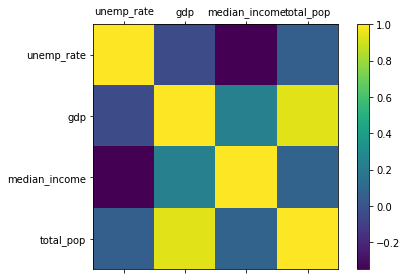

In [212]:
# Select columns
cols = eur_data_final.columns

# Make subplot and figure
fig, ax = plt.subplots(1, 1)

# Generate correlation matrix
corr_data = eur_data_final.corr()

# Generate matplotlib plot
cax = ax.matshow(corr_data) 

# Add colorbar to figure
fig.colorbar(cax)

# Set tick labels
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

fig.tight_layout()